importing data_loader.linear_data_loader
getattr LinearDataLoader
<class 'data_loader.linear_data_loader.LinearDataLoader'>
importing forecasts.moving_average_forecasts
getattr MovingAverageForecasts
<class 'forecasts.moving_average_forecasts.MovingAverageForecasts'>


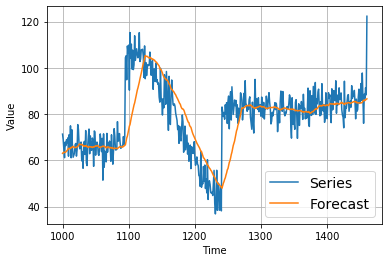

7.142418570620913


In [10]:
# %run ./main.py -c configs/moving_average_config.json

In [3]:
from pandas import read_csv
from utils import hurst

In [19]:
chuj = read_csv("data/testerino.csv")
eh = hurst.hurst(chuj['close'].values)
eh

0.5727157385535725

In [2]:
from data_client.data_client import DataClient

In [3]:
params_dict = {
        'fsym': 'BTC',
        'tsym': 'USD',
        'limit': 2000,
        'e': 'Gemini',
        'extraParams': 'SuperPrzewidywanie'
    }

dc = DataClient()
dc.make_request(params_dict=params_dict)

dict_to_write = dc.data_dictionary['Data']

# dict_to_write[0]['time']

params_dict['toTs'] = dict_to_write[0]['time']

dc.make_request(params_dict=params_dict)

In [4]:
print(dc.data_dictionary['Data'][0]['time'])

1601385600


In [7]:
print(len(dc.data_dictionary['Data']))
print(len(dict_to_write))

4002
2001


In [6]:
[dc.data_dictionary['Data'].append(dict_el) for dict_el in dict_to_write]

dc.data_dictionary['Data'][4001]

{'time': 1601625600,
 'close': 10491.99,
 'high': 10495.78,
 'low': 10491.99,
 'open': 10495.78,
 'volumefrom': 0,
 'volumeto': 0,
 'conversionType': 'force_direct',
 'conversionSymbol': ''}

In [11]:
dc.data_dictionary['Data']

[{'time': 1601385240,
  'close': 10734.16,
  'high': 10740.83,
  'low': 10727.83,
  'open': 10740.83,
  'volumefrom': 6.347,
  'volumeto': 68121.67,
  'conversionType': 'force_direct',
  'conversionSymbol': ''},
 {'time': 1601385300,
  'close': 10731.67,
  'high': 10734.16,
  'low': 10728.33,
  'open': 10734.16,
  'volumefrom': 0.1921,
  'volumeto': 2061.77,
  'conversionType': 'force_direct',
  'conversionSymbol': ''},
 {'time': 1601385360,
  'close': 10720.33,
  'high': 10732.88,
  'low': 10720.33,
  'open': 10731.67,
  'volumefrom': 1.492,
  'volumeto': 16000.08,
  'conversionType': 'force_direct',
  'conversionSymbol': ''},
 {'time': 1601385420,
  'close': 10718.19,
  'high': 10721.87,
  'low': 10714.91,
  'open': 10720.33,
  'volumefrom': 4.659,
  'volumeto': 49942.24,
  'conversionType': 'force_direct',
  'conversionSymbol': ''},
 {'time': 1601385480,
  'close': 10727.61,
  'high': 10727.61,
  'low': 10718.19,
  'open': 10718.19,
  'volumefrom': 0.2696,
  'volumeto': 2889.89,
  '

In [8]:
dc.save_data()

In [10]:
series = read_csv('data/testerino.csv')

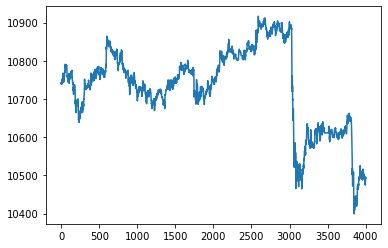

In [16]:
# from utils.plot import plot_better
# plot_better(series.iloc['close'])
from matplotlib import pyplot as plt
plt.plot(series['close'].values)
plt.show()

In [17]:
print(type(series['close']))
print(type(series['close'].values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [17]:
close = read_csv("data/BTCUSD2000MINUT.csv")['close'].values

a, b = close[:1500], close[1500:]
print(a)
print(b)

[10611.14 10606.17 10604.57 ... 10727.01 10725.25 10723.05]
[10720.84 10719.38 10718.4  10719.19 10722.17 10719.8  10728.94 10725.83
 10728.14 10724.44 10727.62 10727.21 10726.85 10714.33 10723.42 10725.74
 10726.36 10727.3  10728.04 10726.14 10727.03 10727.15 10727.21 10731.07
 10732.78 10735.26 10736.95 10734.76 10734.63 10733.85 10738.46 10739.9
 10738.59 10742.98 10750.79 10743.48 10741.47 10740.81 10740.21 10738.73
 10737.45 10737.88 10733.76 10730.38 10727.08 10730.7  10732.81 10732.43
 10726.64 10725.87 10726.34 10729.81 10730.42 10729.39 10728.14 10726.85
 10726.26 10724.69 10729.66 10732.15 10726.05 10726.91 10728.05 10729.01
 10728.12 10719.02 10720.77 10720.37 10720.35 10718.68 10713.   10697.67
 10705.96 10705.26 10704.36 10708.48 10706.78 10705.08 10712.67 10714.17
 10714.84 10707.48 10723.83 10721.25 10721.73 10723.39 10724.96 10726.85
 10724.15 10724.83 10721.12 10721.5  10733.88 10733.64 10736.43 10737.56
 10747.38 10743.82 10746.38 10741.66 10735.28 10738.89 10736.66 1

In [7]:
import numpy as np

a = np.array([[1,2], [3,4]])
print(a)
a = a.flatten('F')
print(a)

[[1 2]
 [3 4]]
[1 2 3 4]


In [10]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')

tf.config.experimental.set_memory_growth(physical_devices[0], True)
